In [94]:
import pandas as pd
import matplotlib.pyplot as plt

In [95]:
title_basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')

In [96]:
title_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')

In [97]:
title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [98]:
title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


# We must merge these two data sets in order to figure out the ratings by title and ratings by runtime.

In [99]:
title_master = title_basics.merge(title_ratings, how='inner')

In [100]:
title_master

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,NaN,6.6,5


In [101]:
title_master['start_year'].value_counts()

2016    8721
2017    8713
2015    8494
2014    8371
2013    7990
2012    7680
2018    7526
2011    7389
2010    6792
2019    2180
Name: start_year, dtype: int64

In [102]:
title_master['runtime_minutes'].value_counts()

90.0     4742
80.0     2166
85.0     2057
100.0    1957
95.0     1933
         ... 
212.0       1
278.0       1
225.0       1
467.0       1
746.0       1
Name: runtime_minutes, Length: 289, dtype: int64

In [112]:
title_master.sort_values('runtime_minutes')

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
47173,tt4597838,Limitless,Limitless,2015,3.0,"Biography,Documentary",6.7,10
66527,tt7379378,I Heart NY,I Heart NY,2017,3.0,"Biography,Documentary",7.8,5
20749,tt2258391,Hermeneutics,Hermeneutics,2012,3.0,"Documentary,History,War",6.2,8
57389,tt5884852,Donald Trump courageously stands up to Bill Cl...,Donald Trump courageously stands up to Bill Cl...,2016,4.0,Documentary,4.3,6
66397,tt7349926,The Coffin Club,The Coffin Club,2017,4.0,"Documentary,Musical",9.4,5
...,...,...,...,...,...,...,...,...
73828,tt9899290,Band Together with Logic,Band Together with Logic,2019,NaN,Documentary,8.7,10
73830,tt9899850,The Agitation,Ashoftegi,2019,NaN,"Drama,Thriller",4.9,14
73844,tt9905796,July Kaatril,July Kaatril,2019,NaN,Romance,9.0,5
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8


In [115]:
type(title_master['runtime_minutes'][0])

numpy.float64

In [111]:
over_500 = title_master.loc[title_master['runtime_minutes'] > 500]

title_master.drop(labels = 'runtime_minutes', title_master[over_500])

SyntaxError: positional argument follows keyword argument (<ipython-input-111-a6b8effad57f>, line 3)

TypeError: 'NoneType' object is not subscriptable

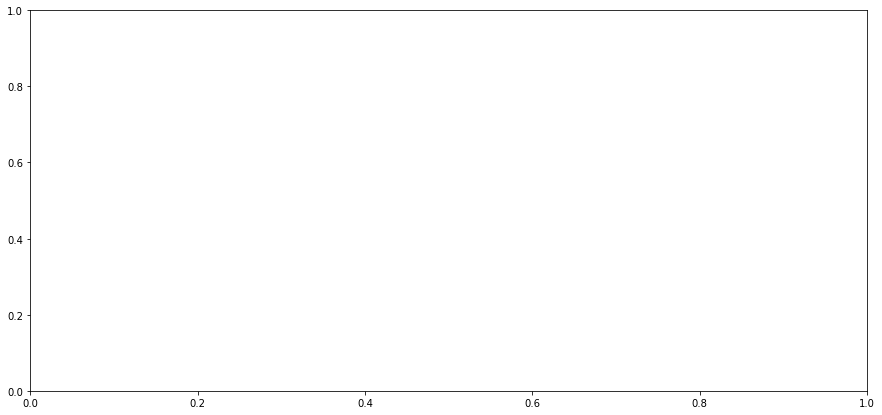

In [90]:
#make a scatter plot 

fig, ax = plt.subplots(figsize=(15, 7))

rating = title_master['averagerating']
time = title_master['runtime_minutes']

ax.scatter(rating, time,
            c='green',
            alpha=0.25,
            s=75,
            marker='.') #ax.scatter will ask for the x axis value, then the y axis value

ax.set_title("Rating by Runtime")

# Set labels for X and Y axes
ax.set_xlabel("Rating")
ax.set_ylabel("Runtime")

# Set text of legend
ax.legend(["a movie"]);